# Load the MNIST/

In [8]:
from sklearn.datasets import load_digits

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = load_digits()

In [7]:
data_df = pd.DataFrame(np.c_[data.data,data.target],
                       columns=list(data.feature_names) + ["target"])
data_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [71]:
X_df = data_df.drop("target",axis=1)
y = data_df["target"].astype(int)

In [26]:
plt.style.use("seaborn-white")

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [41]:
def visual_digit(X:pd.DataFrame,y,index):
    plt.figure(figsize=(2,2))
    digit = X.iloc[index].to_numpy().reshape(8,8)
    plt.imshow(digit,cmap="gray",interpolation="none")
    plt.show()
    print(y[index])


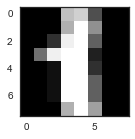

1.0


In [42]:
visual_digit(X_df,y,1)

# Visualizing the PCA

In [43]:
from sklearn.preprocessing import StandardScaler

# Standardized the dataset
scaler = StandardScaler(with_mean=True,with_std=True)
X_scaled = scaler.fit_transform(X_df)


In [44]:
# Find the Covariance matrix
cov_matrix = np.matmul(X_scaled.T,X_scaled)
cov_matrix.shape

(64, 64)

In [54]:
# eigen value and eigen vector
from scipy.linalg import eigh

In [55]:

values,vectors = eigh(cov_matrix,eigvals=(62,63))
print(values)

[10480.54100504 13191.21780885]


In [58]:
print(f"shape of the vector is {vectors.shape}")

vectors = vectors.T

print(f"update shape of the vector {vectors.shape}")

shape of the vector is (64, 2)
update shape of the vector (2, 64)


In [59]:
new_coordinates = np.matmul(vectors,X_scaled.T)
print(f"resultant shape of {vectors.shape} X {X_scaled.T.shape} = {new_coordinates.shape}")

resultant shape of (2, 64) X (64, 1797) = (2, 1797)


In [74]:
dataframe = pd.DataFrame(np.c_[new_coordinates.T,y],
                         columns=["2pc","1pc","target"])
dataframe["target"] = dataframe["target"].astype(int)

In [75]:
dataframe

,2pc,1pc,target
0,0.954502,1.914214,0
1,-0.924636,0.588980,1
2,0.317189,1.302039,2
3,0.868772,-3.020770,3
4,1.093480,4.528949,4
...,...,...,...
1792,-0.255024,0.104331,9
1793,1.429611,2.423234,0
1794,0.147911,1.022596,8
1795,0.380906,1.076055,9


<AxesSubplot:xlabel='2pc', ylabel='1pc'>

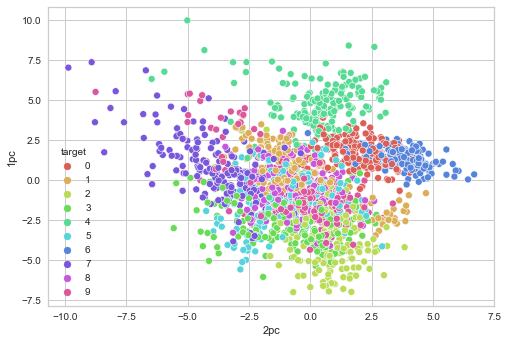

In [91]:
import seaborn as sns
sns.scatterplot(data=dataframe,hue="target",x="2pc",y="1pc",legend="full",palette=sns.color_palette("hls",10))

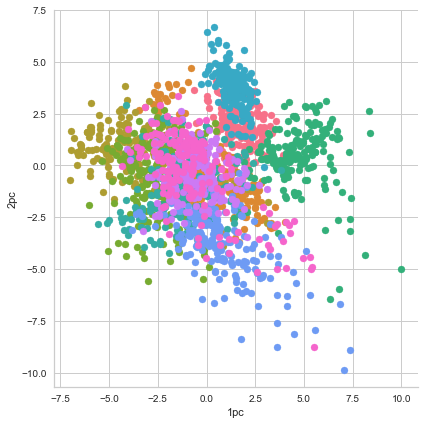

In [105]:
sns.FacetGrid(data=dataframe,hue="target",height=6).map(plt.scatter,"1pc","2pc")

# PCA using the Scikie learn

In [93]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)

In [94]:
pca_data = pca.fit_transform(X_scaled)

In [95]:
pca_data.shape

(1797, 2)

In [96]:
pca_data

array([[ 1.9142093 , -0.9545064 ],
       [ 0.58898474,  0.92465792],
       [ 1.30205036, -0.31709136],
       ...,
       [ 1.02259482, -0.14794907],
       [ 1.07605476, -0.38090818],
       [-1.25771658, -2.22769738]])

In [101]:
pca_df = pd.DataFrame(np.c_[pca_data,y],
                      columns=["1pc","2pc","target"])

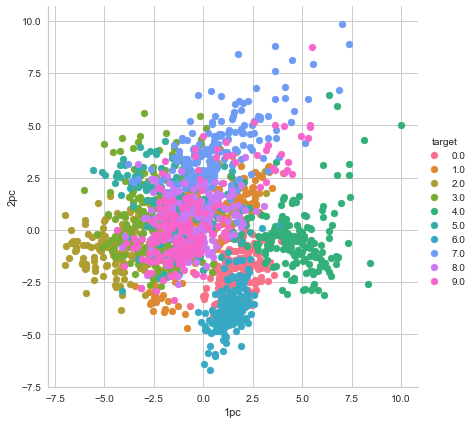

In [104]:
g = sns.FacetGrid(data=pca_df,hue="target",height=6).map(plt.scatter,"1pc","2pc")
g.add_legend()